In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [22]:
train_data = pd.read_csv('training_set_features.csv')
test_data = pd.read_csv('test_set_features.csv')

In [23]:
train_data

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [24]:
test_data

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi,NaN,NaN
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp,NaN,NaN
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik,NaN,NaN
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov,NaN,NaN
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN,NaN,NaN


In [25]:
train_data.dtypes

respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

<Axes: >

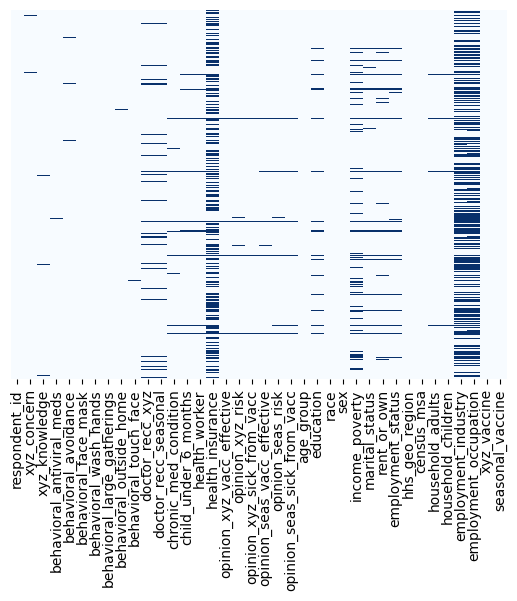

In [26]:
sns.heatmap(train_data.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=train_data.columns)

In [27]:
train_data.drop(['employment_industry','employment_occupation','health_insurance'],axis = 1,inplace=True)

<Axes: >

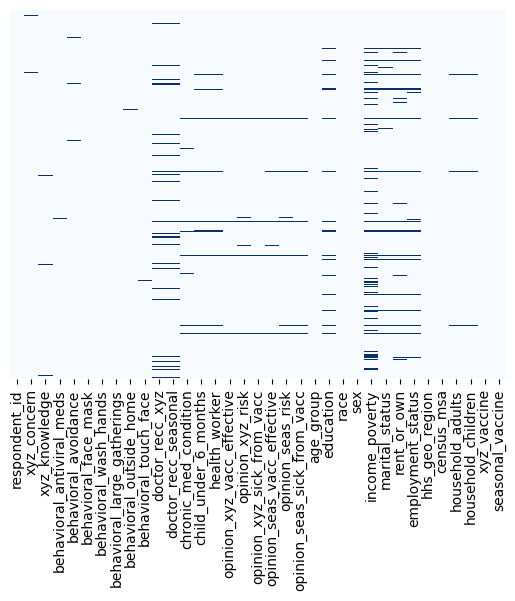

In [28]:
sns.heatmap(train_data.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=train_data.columns)

<Axes: >

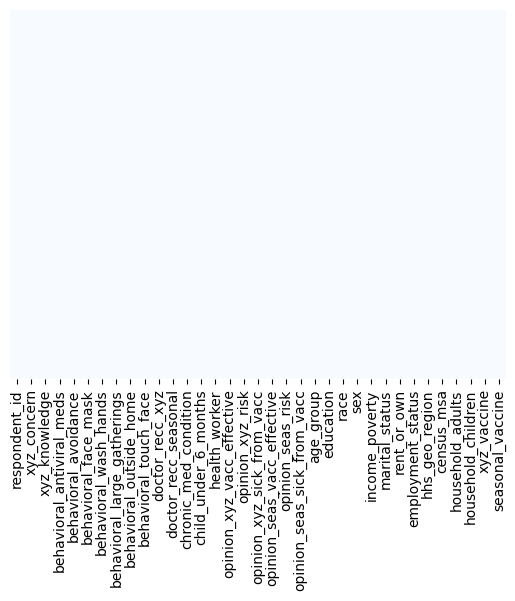

In [29]:
feature_cols = [col for col in train_data.columns if col not in ['xyz_vaccine','seasonal_vaccine']]
cat_cols = [col for col in feature_cols if (train_data[col].dtype == float or train_data[col].dtype == object)]
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
train_data[cat_cols] = imputer.fit_transform(train_data[cat_cols])

sns.heatmap(train_data.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=train_data.columns)

<Axes: >

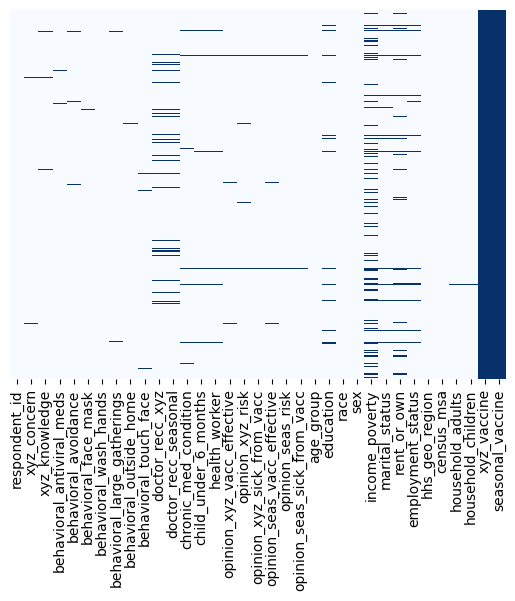

In [30]:
test_data.drop(['employment_industry','employment_occupation','health_insurance'],axis = 1,inplace=True)
sns.heatmap(test_data.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=test_data.columns)

<Axes: >

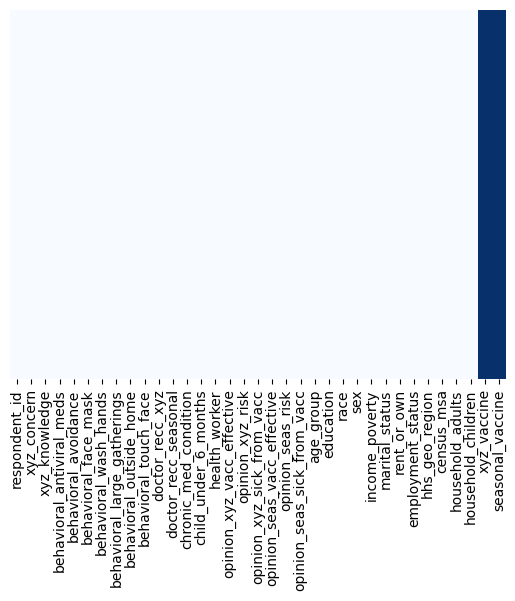

In [31]:
feature_cols = [col for col in test_data.columns if col not in ['xyz_vaccine','seasonal_vaccine']]
cat_cols = [col for col in feature_cols if (test_data[col].dtype == float or test_data[col].dtype == object)]
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
test_data[cat_cols] = imputer.fit_transform(test_data[cat_cols])

sns.heatmap(test_data.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=test_data.columns)

Exploratory Data Analysis

In [32]:
mapping_dictionary_value_age={'18 - 34 Years':1,'35 - 44 Years':2,'45 - 54 Years':3,'55 - 64 Years':4,'65+ Years':5}
train_data['age_group']=train_data.age_group.map(mapping_dictionary_value_age)
test_data['age_group']=test_data.age_group.map(mapping_dictionary_value_age)


mapping_dictionary_value_education={'< 12 Years':1,'12 Years':2,'Some College':3,'College Graduate':4}
train_data['education']=train_data.education.map(mapping_dictionary_value_education)
test_data['education']=test_data.education.map(mapping_dictionary_value_education)

mapping_dictionary_value_race={'White':1,'Black':2,'Other or Multiple':3,'Hispanic':4}
train_data['race']=train_data.race.map(mapping_dictionary_value_race)
test_data['race']=test_data.race.map(mapping_dictionary_value_race)

mapping_dictionary_value_sex={'Female':1,'Male':2}
train_data['sex']=train_data.sex.map(mapping_dictionary_value_sex)
test_data['sex']=test_data.sex.map(mapping_dictionary_value_sex)

mapping_dictionary_value_poverty={'Below Poverty':1,'<= $75,000, Above Poverty':2,'> $75,000':3}
train_data['income_poverty']=train_data.income_poverty.map(mapping_dictionary_value_poverty)
test_data['income_poverty']=test_data.income_poverty.map(mapping_dictionary_value_poverty)

mapping_dictionary_value_married={'Not Married':1,'Married':2}
train_data['marital_status']=train_data.marital_status.map(mapping_dictionary_value_married)
test_data['marital_status']=test_data.marital_status.map(mapping_dictionary_value_married)

mapping_dictionary_value_rent={'Rent':1,'Own':2}
train_data['rent_or_own']=train_data.rent_or_own.map(mapping_dictionary_value_rent)
test_data['rent_or_own']=test_data.rent_or_own.map(mapping_dictionary_value_rent)

mapping_dictionary_value_emp={'Unemployed':1,'Employed':2,'Not in Labor Force':3}
train_data['employment_status']=train_data.employment_status.map(mapping_dictionary_value_emp)
test_data['employment_status']=test_data.employment_status.map(mapping_dictionary_value_emp)

mapping_dictionary_value_msa={'Non-MSA':1,'MSA, Not Principle  City':2,'MSA, Principle City':3}
train_data['census_msa']=train_data.census_msa.map(mapping_dictionary_value_msa)
test_data['census_msa']=test_data.census_msa.map(mapping_dictionary_value_msa)

mapping_dictionary_value_geo={'oxchjgsf':1,'bhuqouqj':2,'qufhixun':3,'lrircsnp':4,'atmpeygn':5,'lzgpxyit':6,'fpwskwrf':7,'mlyzmhmf':8,'dqpwygqj':9,'kbazzjca':10}
train_data['hhs_geo_region']=train_data.hhs_geo_region.map(mapping_dictionary_value_geo)
test_data['hhs_geo_region']=test_data.hhs_geo_region.map(mapping_dictionary_value_geo)

<Axes: >

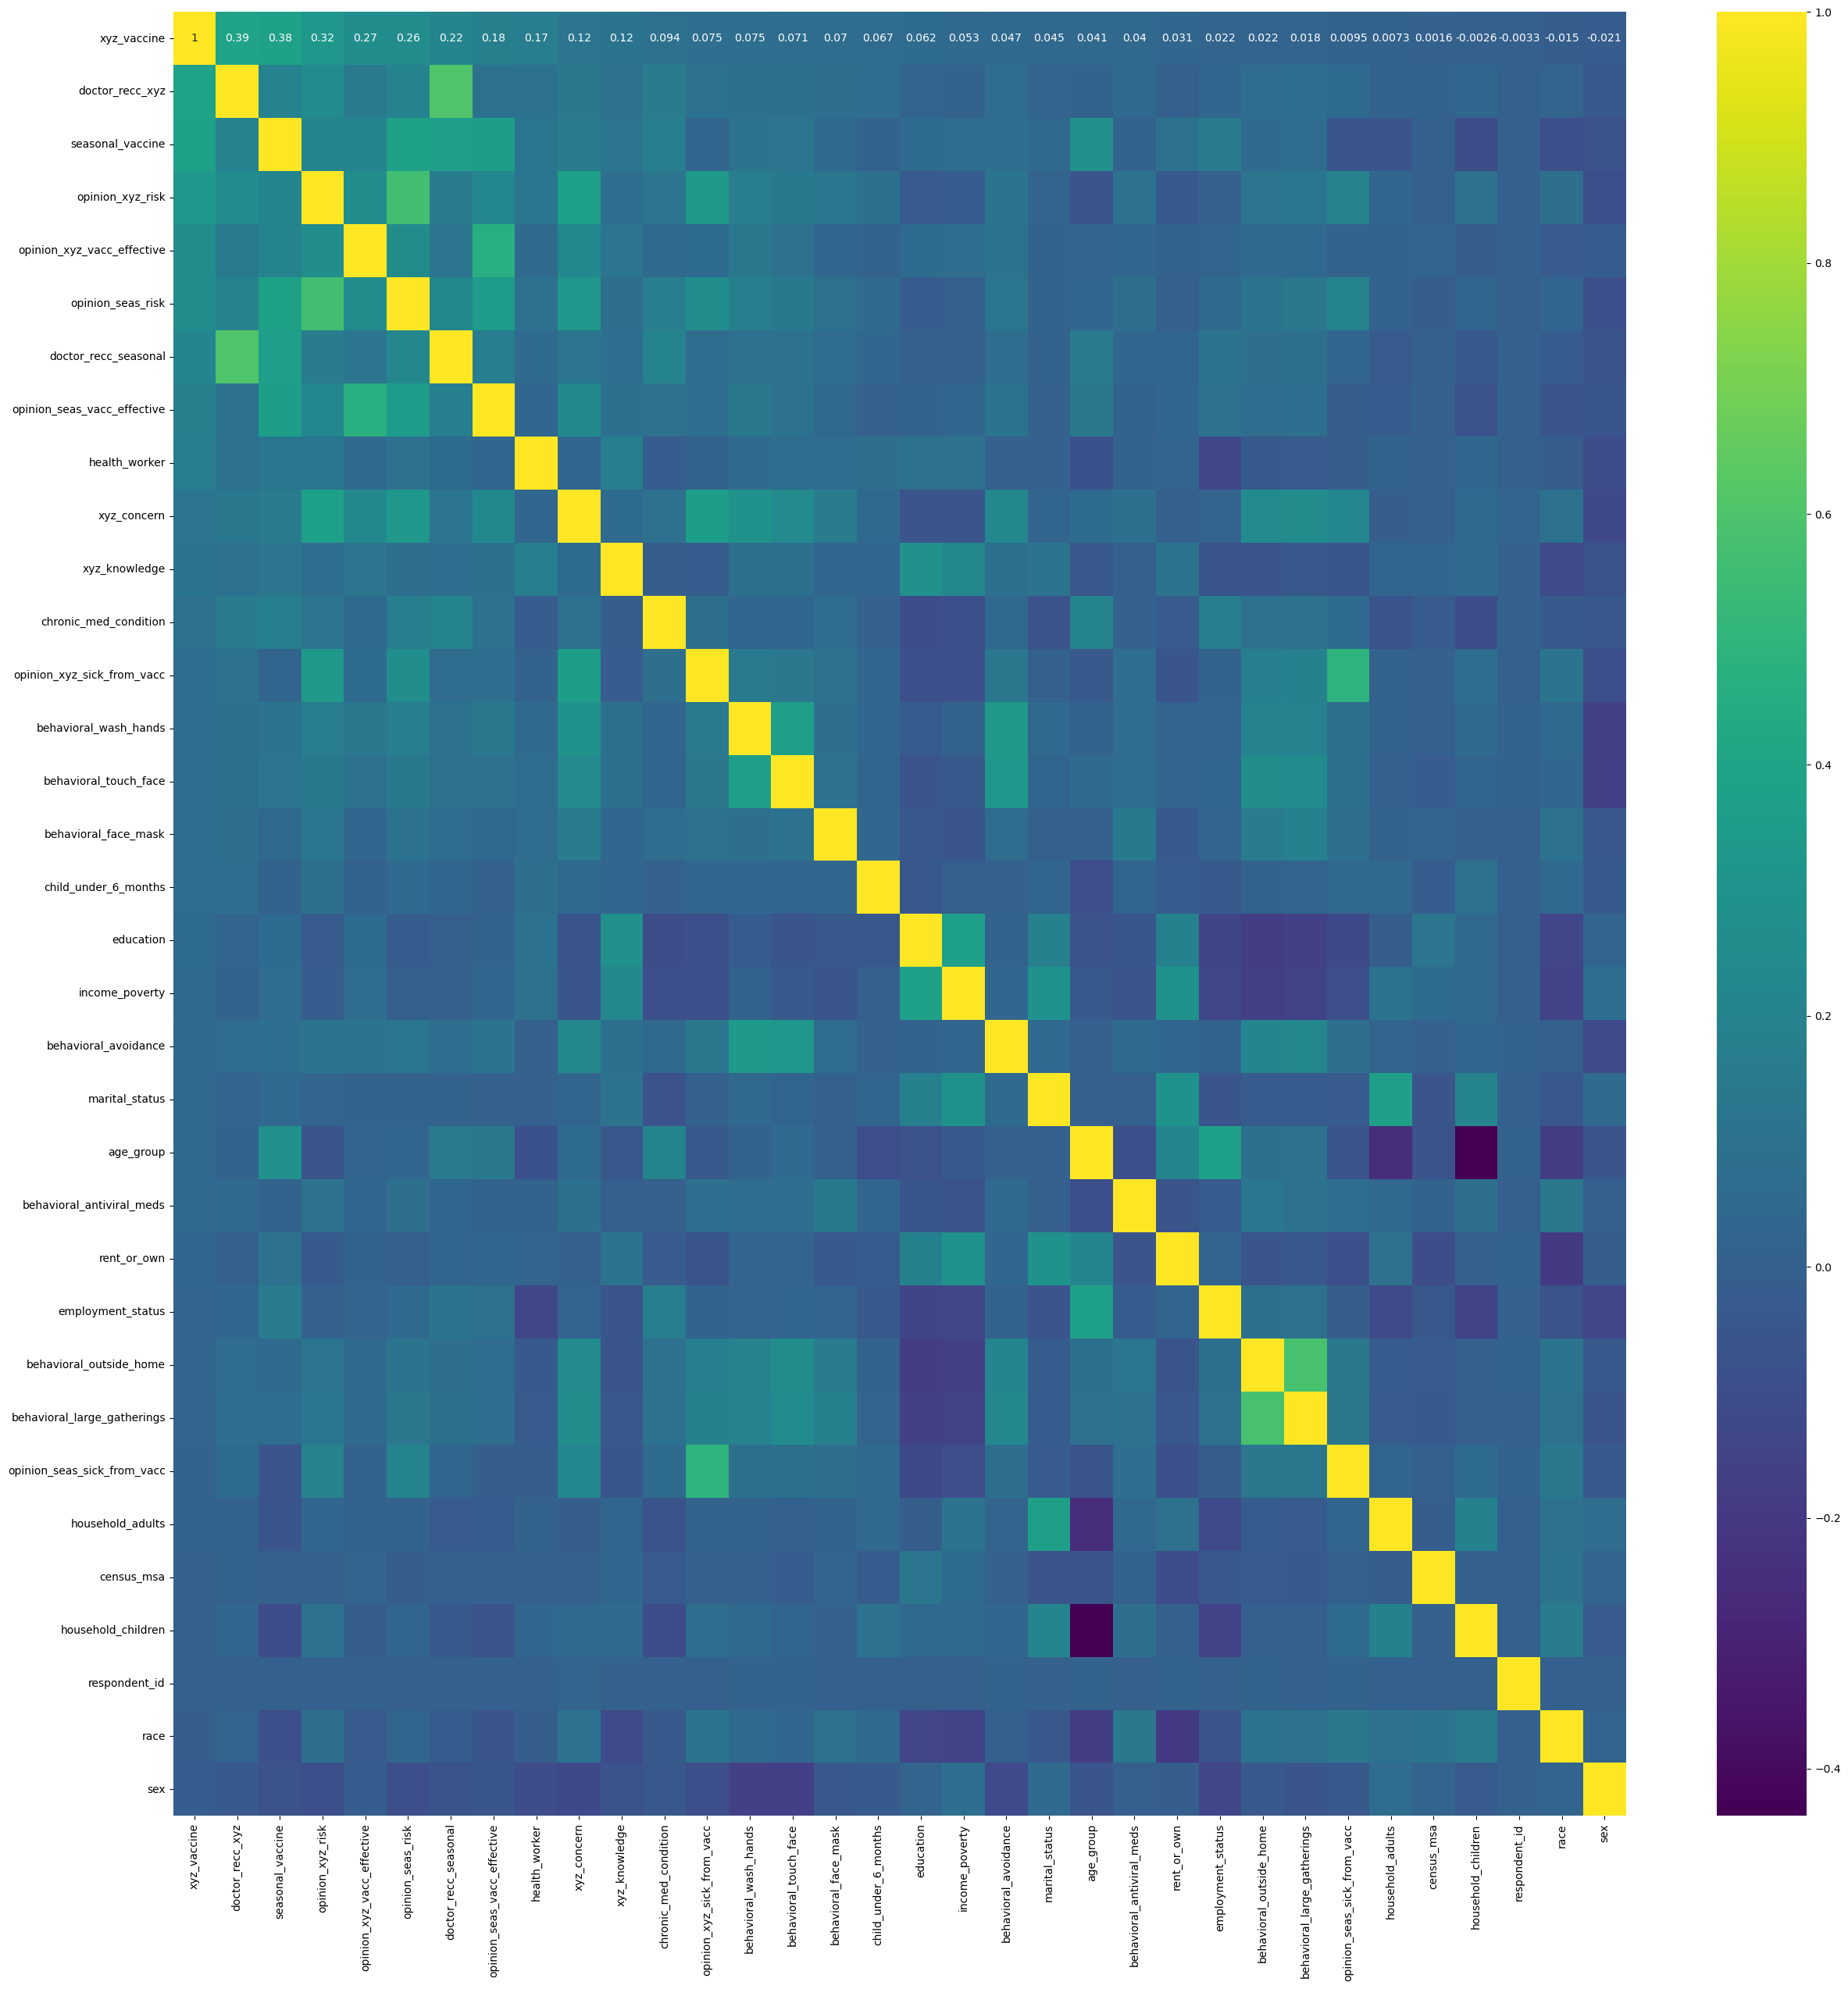

In [33]:
k = 34 #number of variables for heatmap
cols = train_data.corr().nlargest(k, 'xyz_vaccine')['xyz_vaccine'].index
cm = train_data[cols].corr()
plt.figure(figsize=(30,30))
sns.heatmap(cm, annot=True, cmap = 'viridis')

<Axes: >

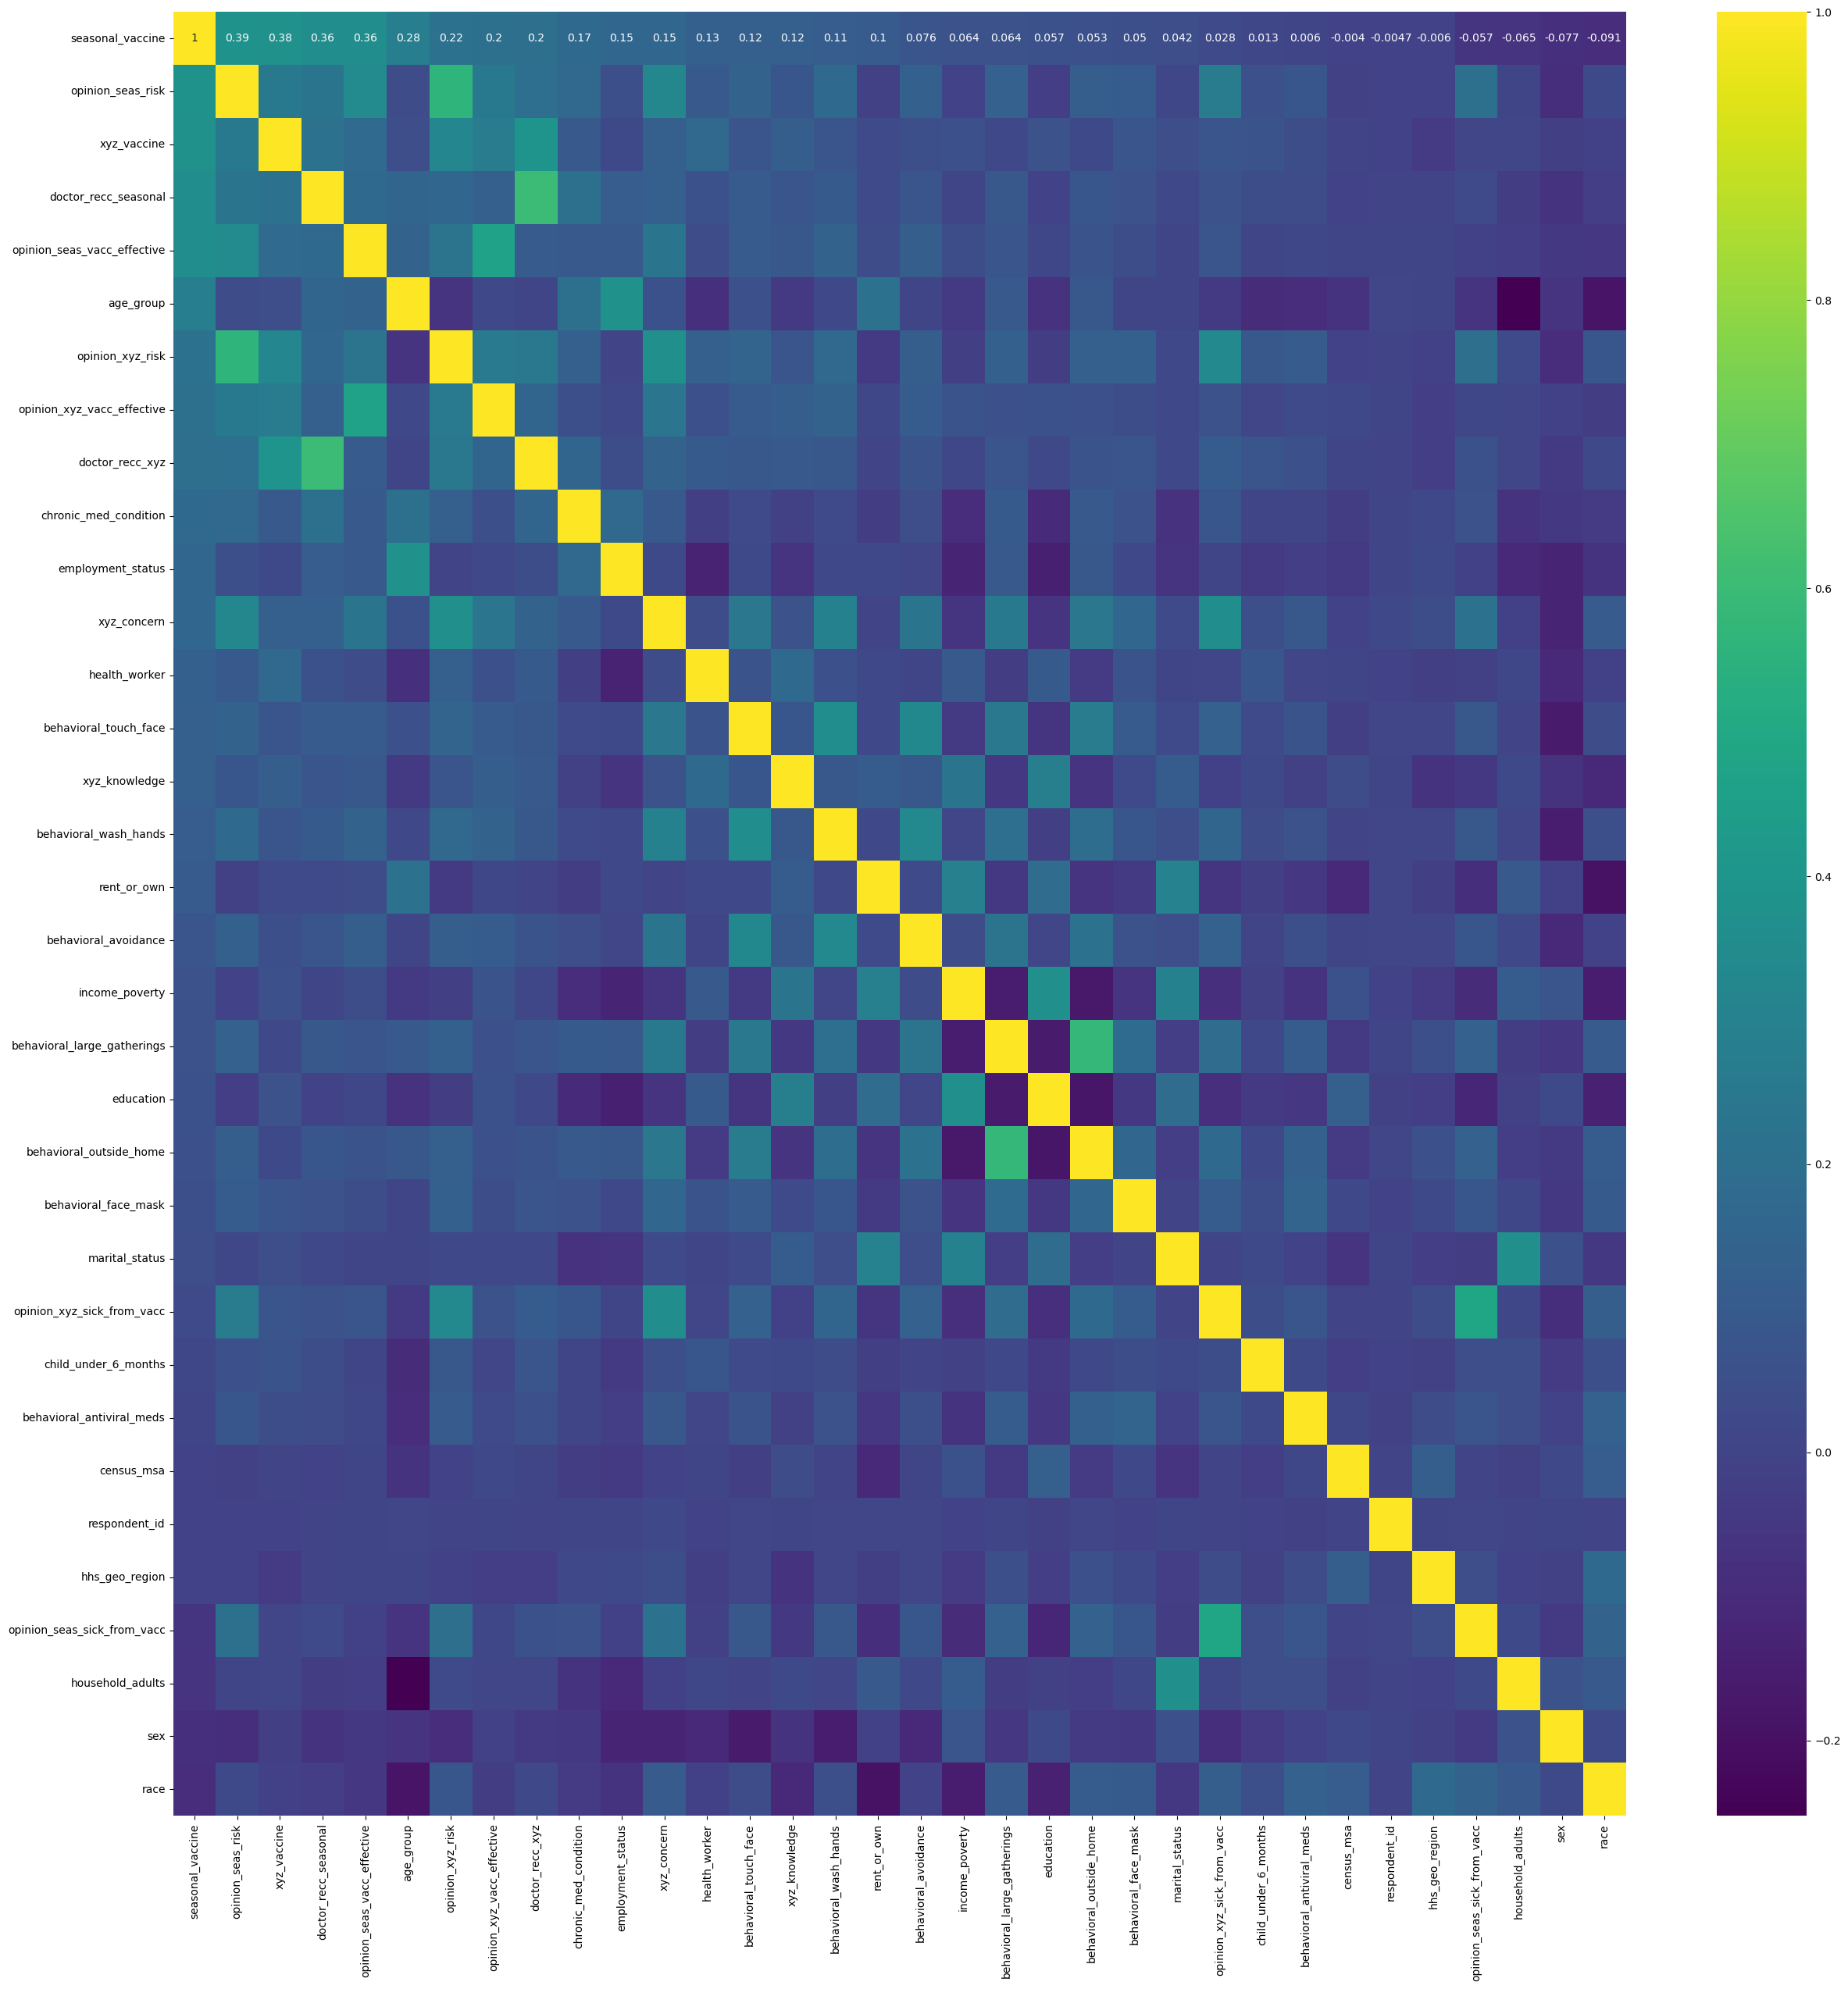

In [34]:
k = 34 #number of variables for heatmap
cols = train_data.corr().nlargest(k, 'seasonal_vaccine')['seasonal_vaccine'].index
cm = train_data[cols].corr()
plt.figure(figsize=(30,30))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [35]:
train_data.columns.to_list()

['respondent_id',
 'xyz_concern',
 'xyz_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_xyz',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'opinion_xyz_vacc_effective',
 'opinion_xyz_risk',
 'opinion_xyz_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'household_adults',
 'household_children',
 'xyz_vaccine',
 'seasonal_vaccine']

Logistic Regression

xyz_vaccine

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [46]:
X = train_data.iloc[:,[10,11,15,16,18,19]]
Y = train_data.iloc[:,33]

model_xyz = LogisticRegression()
model_xyz.fit(X,Y)

y_pred = model_xyz.predict_proba(X)[:,0]
y_pred

array([0.96859994, 0.70063517, 0.96053501, ..., 0.74789149, 0.96859994,
       0.86320897])

seasonal_vaccine

In [47]:
X = train_data.iloc[:,[11,15,16,18,19,21]]
Y = train_data.iloc[:,34]


model_seasonal = LogisticRegression()
model_seasonal.fit(X,Y)

y_pred = model_seasonal.predict_proba(X)[:,0]
y_pred

array([0.91036001, 0.79592965, 0.91264061, ..., 0.28604548, 0.97054177,
       0.52581688])

Predicting on Test Data

xyz_vaccine

In [53]:
X_test_xyz = test_data.iloc[:,[10,11,15,16,18,19]]
y_pred_xyz = model_xyz.predict_proba(X_test_xyz)[:,0]
list(y_pred_xyz)


[0.8632089705416446,
 0.9293259299662303,
 0.615786661213022,
 0.5679710748964705,
 0.7762096183514839,
 0.7225866692487649,
 0.6861689632197312,
 0.8766070729135688,
 0.9647892811259179,
 0.8508046229382723,
 0.9723265973417401,
 0.7762096183514839,
 0.9369573617378866,
 0.8809088327895864,
 0.5315336716548136,
 0.9513026941819042,
 0.29859675839894395,
 0.8809088327895864,
 0.9293259299662303,
 0.9733898286615452,
 0.7549575582858447,
 0.7695693282984556,
 0.9202912819296166,
 0.9202912819296166,
 0.9881495463080419,
 0.8767161639849064,
 0.24710211340819532,
 0.20316273586271505,
 0.8652279891249295,
 0.892788626636557,
 0.943392778181343,
 0.37518905828404747,
 0.892788626636557,
 0.8367061115414284,
 0.8170112230638608,
 0.892788626636557,
 0.966135568882811,
 0.9134591043591461,
 0.8747933832118259,
 0.892788626636557,
 0.892788626636557,
 0.8314711319945804,
 0.9234763549754421,
 0.4061390651730803,
 0.7695693282984556,
 0.949397607637047,
 0.7695693282984556,
 0.954966712284014

seasonal_vaccine

In [52]:
X_test_seasonal = test_data.iloc[:,[11,15,16,18,19,21]]
y_pred_seasonal = model_seasonal.predict_proba(X_test_seasonal)[:,0]
list(y_pred_seasonal)

[0.7824841317128229,
 0.9085900336578945,
 0.275990000428292,
 0.11093996727844668,
 0.5989645536157917,
 0.267820685412703,
 0.4857712472987481,
 0.7445826350934583,
 0.8511632506735399,
 0.21413096356941586,
 0.6350439583913012,
 0.6885680739751504,
 0.15637561325477545,
 0.7747904303384581,
 0.45857135250993053,
 0.8619218723726683,
 0.14863606031824883,
 0.4173741790887675,
 0.81935414054031,
 0.9510606009398723,
 0.20587454127807514,
 0.5129713548238138,
 0.8054855023338932,
 0.8054855023338932,
 0.7061446959443739,
 0.8731770339519223,
 0.08950463136197084,
 0.5973428362463296,
 0.5146567852304187,
 0.8593432455295381,
 0.9062145546954027,
 0.10165570142004443,
 0.8049564118605548,
 0.8642577384066272,
 0.09005598333116671,
 0.653170174245673,
 0.5842553646184376,
 0.38559455703700896,
 0.043282692268995726,
 0.7360006305777429,
 0.653170174245673,
 0.9077460161209286,
 0.41824704389753653,
 0.11027625197342539,
 0.5129713548238138,
 0.9449323598894499,
 0.3246102833684653,
 0.83

Writing onto csv file

In [56]:
dict = {'respondent_id': test_data['respondent_id'], 'xyz_vaccine': y_pred_xyz, 'seasonal_vaccine': y_pred_seasonal}

data = pd.DataFrame(dict)
data

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.863209,0.782484
1,26708,0.929326,0.908590
2,26709,0.615787,0.275990
3,26710,0.567971,0.110940
4,26711,0.776210,0.598965
...,...,...,...
26703,53410,0.630350,0.515572
26704,53411,0.911156,0.775379
26705,53412,0.840602,0.789706
26706,53413,0.947554,0.561156


In [57]:
data.to_csv('file1.csv')